# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Fatimatuz Zahra
- **Email:** fatimatuznzahra@gmail.com
- **ID Dicoding:** fatimatuzzahra

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren kualitas udara di stasiun **Changping**? Polutan apa yang paling tinggi?

2. Jika dibandingkan dengan kota **Huairou**, apakah terdapat perbedaan dalam pola kualitas udara di kota **Dongsi** sepanjang tahun 2016?

## Import Semua Packages/Library yang Digunakan

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [166]:
# Memuat dataset Air Quality untuk stasiun Changping, Dongsi, dan Huairou
changping_df = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
dongsi_df = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')
huairou_df = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv')

In [167]:
# Menggabungkan dataset
china_df = pd.concat([changping_df, dongsi_df, huairou_df], ignore_index=True)

In [168]:
china_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**

Dataset Air Quality pada Station Changping, Dongsi, dan Huairou memiliki atribut berikut:
- year, month, day, hour: Tanggal dan waktu pengukuran.
- PM2.5, PM10, SO2, NO2, CO, O3: Konsentrasi berbagai polutan.
- TEMP, PRES, DEWP, RAIN: Kondisi meteorologi.
- wd, WSPM: Arah dan kecepatan angin.
station: Nama stasiun.

### Assessing Data

In [169]:
china_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       105192 non-null  int64  
 1   year     105192 non-null  int64  
 2   month    105192 non-null  int64  
 3   day      105192 non-null  int64  
 4   hour     105192 non-null  int64  
 5   PM2.5    102715 non-null  float64
 6   PM10     103280 non-null  float64
 7   SO2      102921 non-null  float64
 8   NO2      101285 non-null  float64
 9   CO       99052 non-null   float64
 10  O3       102773 non-null  float64
 11  TEMP     105068 non-null  float64
 12  PRES     105069 non-null  float64
 13  DEWP     105066 non-null  float64
 14  RAIN     105066 non-null  float64
 15  wd       104672 non-null  object 
 16  WSPM     105086 non-null  float64
 17  station  105192 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 14.4+ MB


In [170]:
# Memeriksa Missing Values
china_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,2477
PM10,1912
SO2,2271
NO2,3907
CO,6140


In [171]:
# Memeriksa Data Duplikat
china_df.duplicated().sum()

0

**Insight:**
- Terdapat 105.192 titik data.
- Beberapa kolom memiliki data hilang, dengan jumlah yang bervariasi dari sedikit (TEMP, PRES) hingga banyak (CO, PM2.5, PM10)
- Sebagian besar kolom menggunakan tipe data numerik (float64 dan int64) sesuai harapan. Namun, kolom "wd" (arah angin) menggunakan tipe data object
- Tidak ditemukan entri duplikat

### Cleaning Data

In [172]:
# Menghapus Missing Values
china_df.dropna(inplace=True)

In [173]:
china_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


## Exploratory Data Analysis (EDA)

In [174]:
china_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000,94727.000000
mean,18167.837786,2014.734922,6.526133,15.678751,11.556441,74.985984,98.978308,14.748067,43.417607,1164.559703,57.992902,13.096033,1009.495327,1.812300,0.063069,1.797074
std,9904.569133,1.153880,3.467959,8.776780,6.941073,76.212898,88.638926,20.303023,31.327744,1076.205204,55.507483,11.475372,10.321454,13.805918,0.803611,1.260320
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-19.900000,982.400000,-35.300000,0.000000,0.000000
25%,10004.000000,2014.000000,4.000000,8.000000,6.000000,19.000000,33.000000,2.000000,19.000000,500.000000,15.000000,3.000000,1001.200000,-9.700000,0.000000,1.000000
50%,18341.000000,2015.000000,7.000000,16.000000,12.000000,51.000000,76.000000,6.000000,36.000000,800.000000,47.000000,14.000000,1009.100000,2.100000,0.000000,1.400000
75%,26641.000000,2016.000000,10.000000,23.000000,18.000000,105.000000,138.000000,18.000000,61.000000,1500.000000,81.000000,22.800000,1017.600000,14.450000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,695.000000,993.000000,315.000000,258.000000,10000.000000,1071.000000,41.400000,1042.000000,29.100000,52.100000,12.900000


### Explore Korelasi Matriks Semua Kolom

In [175]:
china_df.corr(numeric_only = True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.967837,0.041736,0.020141,-0.004040,-0.030764,-0.045019,-0.261355,-0.019996,0.030211,-0.098790,-0.116956,0.155955,-0.071686,0.008201,0.043176
year,0.967837,1.000000,-0.210103,-0.006794,-0.003996,-0.030780,-0.036951,-0.207046,-0.031147,0.017664,-0.070372,-0.147785,0.154715,-0.139597,0.003935,0.075447
month,0.041736,-0.210103,1.000000,0.022893,-0.002457,0.002898,-0.029659,-0.195008,0.044899,0.048506,-0.103828,0.134168,-0.012817,0.277112,0.016471,-0.131193
day,0.020141,-0.006794,0.022893,1.000000,-0.001503,-0.007045,0.014167,-0.012150,0.004681,-0.023257,-0.002415,0.014570,0.023922,0.026464,0.000333,-0.015424
hour,-0.004040,-0.003996,-0.002457,-0.001503,1.000000,0.023676,0.068311,0.041869,0.025731,-0.011656,0.268838,0.142355,-0.041773,-0.012148,0.014978,0.133061
PM2.5,-0.030764,-0.030780,0.002898,-0.007045,0.023676,1.000000,0.880961,0.476133,0.671759,0.789380,-0.102012,-0.103955,0.011936,0.128724,-0.014318,-0.263662
PM10,-0.045019,-0.036951,-0.029659,0.014167,0.068311,0.880961,1.000000,0.448810,0.642035,0.702297,-0.062316,-0.074523,-0.018798,0.073411,-0.020789,-0.150707
SO2,-0.261355,-0.207046,-0.195008,-0.012150,0.041869,0.476133,0.448810,1.000000,0.514316,0.520637,-0.140036,-0.295239,0.224688,-0.261412,-0.039940,-0.115317
NO2,-0.019996,-0.031147,0.044899,0.004681,0.025731,0.671759,0.642035,0.514316,1.000000,0.717960,-0.422699,-0.291338,0.220100,-0.075536,-0.044002,-0.344675
CO,0.030211,0.017664,0.048506,-0.023257,-0.011656,0.789380,0.702297,0.520637,0.717960,1.000000,-0.285086,-0.299612,0.179589,-0.040840,-0.010554,-0.288267


### Explore Rata-Rata Value Berdasarkan Tahun

In [176]:
china_df.groupby('year').mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3665.450421,7.488010,15.854887,11.627231,76.056973,99.079302,20.888352,44.682217,1116.670418,60.601186,14.799711,1007.310705,4.039745,0.055924,1.630437
2014,11882.351897,6.748115,15.585871,11.556921,79.423714,106.880264,19.310443,46.114579,1185.704170,62.716249,14.074395,1008.996034,2.299363,0.049386,1.758216
2015,20475.957507,6.515368,15.686502,11.534026,76.023602,98.781105,11.963097,40.818542,1188.375732,57.819023,13.058789,1009.616874,2.270388,0.080431,1.831683
2016,29231.785061,6.481235,15.713508,11.528560,67.422340,90.588020,8.815093,41.648244,1102.620228,54.701778,13.140064,1009.643532,1.873479,0.073528,1.877438
2017,34359.570184,1.480587,15.226979,11.565704,84.208810,104.363116,15.454455,49.006471,1475.211548,40.151319,0.012855,1020.037981,-13.726157,0.002738,2.022325


**Insight:**
- Data menunjukkan variasi yang signifikan dalam konsentrasi polutan dan faktor meteorologi.
- PM2.5 dan PM10 merupakan polutan yang paling tinggi konsentrasinya.
- Ada hubungan yang kuat antara PM2.5, PM10, SO2, NO2, dan CO, serta hubungan negatif antara suhu dan polutan ini.





> Deskripsi Korelasi Antar Polutan dan Faktor Meteorologi:

- PM2.5 dan PM10 memiliki korelasi yang sangat kuat (0.9678), menunjukkan bahwa keduanya cenderung meningkat atau menurun bersamaan.
- PM2.5, PM10, SO2, NO2, dan CO memiliki korelasi positif yang moderat hingga kuat satu sama lain, mengindikasikan adanya sumber emisi yang serupa.
- O3 memiliki korelasi negatif dengan PM2.5, PM10, SO2, NO2, dan CO, menunjukkan bahwa peningkatan konsentrasi polutan tersebut dapat mengurangi konsentrasi O3.
- Temperatur (TEMP) memiliki korelasi negatif yang kuat dengan PM2.5, PM10, SO2, NO2, dan CO, menunjukkan bahwa suhu yang lebih tinggi dapat mengurangi konsentrasi polutan.
- Tekanan udara (PRES) memiliki korelasi yang sangat lemah dengan polutan dan faktor meteorologi lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren kualitas udara di stasiun **Changping**? Polutan apa yang paling tinggi?

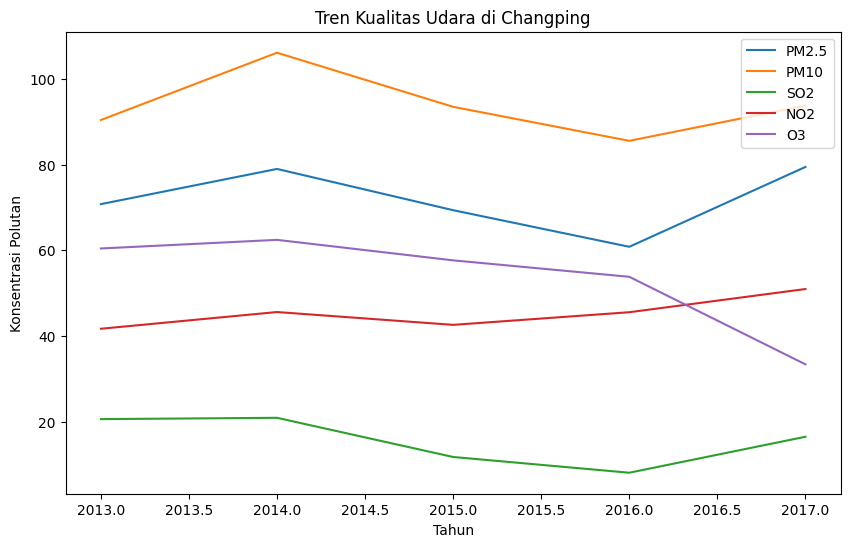

In [177]:
# Memfilter data untuk stasiun Changping
changping_df = china_df[china_df['station'] == 'Changping']

# Mengelompokkan data Changping berdasarkan tahun dan menghitung rata-rata tiap polutan
changping_byyear = changping_df.groupby('year').mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(changping_byyear['PM2.5'], label='PM2.5')
plt.plot(changping_byyear['PM10'], label='PM10')
plt.plot(changping_byyear['SO2'], label='SO2')
plt.plot(changping_byyear['NO2'], label='NO2')
plt.plot(changping_byyear['O3'], label='O3')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Polutan')
plt.title('Tren Kualitas Udara di Changping')
plt.legend()
plt.show()

**Insight:**
- Secara keseluruhan, dari tahun 2013 hingga 2017, konsentrasi polutan utama seperti PM2.5, PM10, SO2, NO2, dan O3 menunjukkan tren menurun. Namun, ada sedikit peningkatan kembali pada tahun 2017 untuk PM2.5 dan PM10
- Dari grafik terlihat bahwa polutan PM10 (warna oranye) memiliki konsentrasi tertinggi dibandingkan dengan polutan lainnya sepanjang periode 2013–2017, diikuti oleh PM2.5
- Polutan O3 menunjukkan penurunan yang signifikan, terutama setelah 2016
- NO2 relatif stabil sepanjang tahun, dengan sedikit peningkatan menjelang 2017

### Pertanyaan 2: Jika dibandingkan dengan kota Huairou, apakah terdapat perbedaan signifikan dalam pola kualitas udara di kota Dongsi sepanjang tahun 2016?

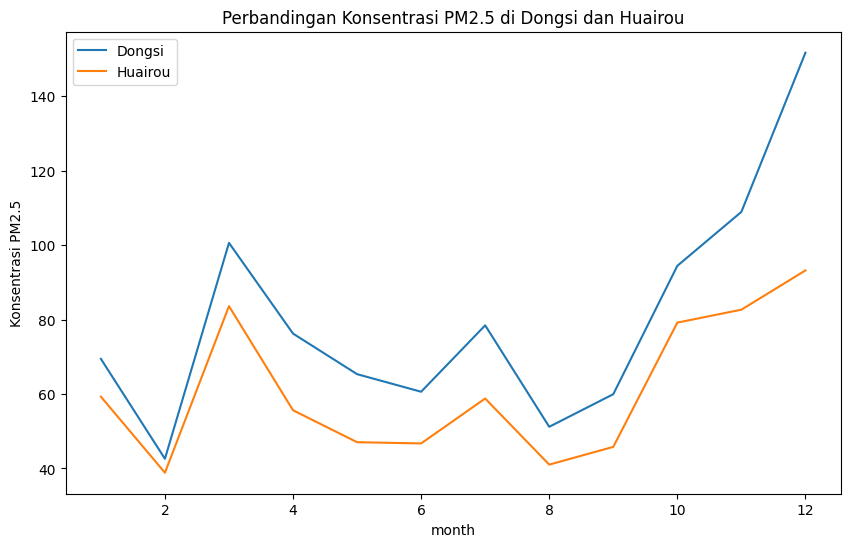

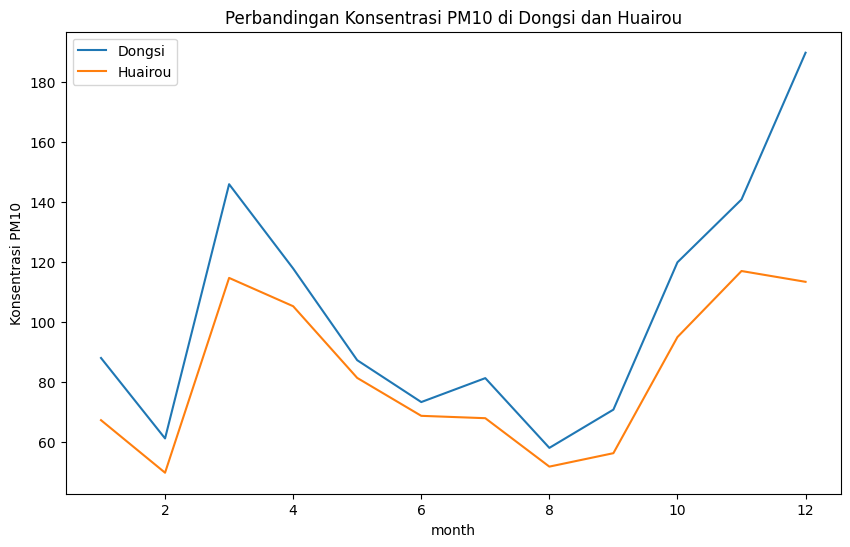

In [178]:
# Memfilter data untuk tahun 2016
china_2016 = china_df[china_df['year'] == 2016]

# Memisahkan data untuk stasiun Dongsi dan Huairou
dongsi_2016 = china_2016[china_2016['station'] == 'Dongsi']
huairou_2016 = china_2016[china_2016['station'] == 'Huairou']

# Mengelompokkan data Dongsi dan Huairou berdasarkan bulan dan menghitung rata-rata tiap polutan
dongsi_bymonth = dongsi_2016.groupby('month').mean(numeric_only=True)
huairou_bymonth = huairou_2016.groupby('month').mean(numeric_only=True)

# Plot PM2.5
plt.figure(figsize=(10, 6))
plt.plot(dongsi_bymonth['PM2.5'], label='Dongsi')
plt.plot(huairou_bymonth['PM2.5'], label='Huairou')
plt.xlabel('month')
plt.ylabel('Konsentrasi PM2.5')
plt.title('Perbandingan Konsentrasi PM2.5 di Dongsi dan Huairou')
plt.legend()
plt.show()

# Plot PM10
plt.figure(figsize=(10, 6))
plt.plot(dongsi_bymonth['PM10'], label='Dongsi')
plt.plot(huairou_bymonth['PM10'], label='Huairou')
plt.xlabel('month')
plt.ylabel('Konsentrasi PM10')
plt.title('Perbandingan Konsentrasi PM10 di Dongsi dan Huairou')
plt.legend()
plt.show()

**Insight:**
- Kota Dongsi secara umum memiliki konsentrasi PM2.5 dan PM10 yang lebih tinggi dibandingkan Huairou sepanjang tahun. Ini menunjukkan bahwa kualitas udara di Dongsi lebih buruk dibandingkan Huairou pada tahun 2016
- Polusi PM2.5 dan PM10 di Dongsi mencapai puncaknya sekitar bulan Desember, dengan nilai konsentrasi yang jauh lebih tinggi daripada Huairou. Kenaikan yang signifikan di akhir tahun menunjukkan adanya periode kualitas udara yang sangat buruk di Dongsi
- Pada bulan Februari dan beberapa bulan tengah tahun, perbedaan kualitas udara antara kedua kota tidak terlalu signifikan

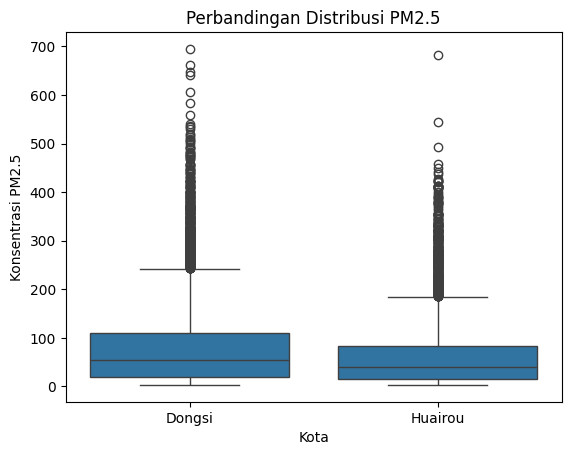

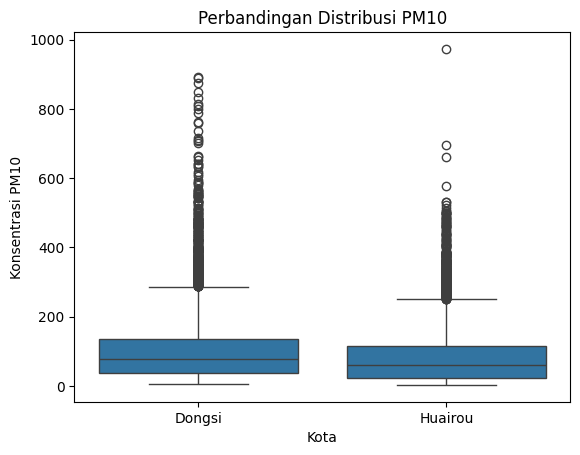

In [179]:
# Box plot PM2.5
sns.boxplot(x='station', y='PM2.5', data=pd.concat([dongsi_2016, huairou_2016]))
plt.xlabel('Kota')
plt.ylabel('Konsentrasi PM2.5')
plt.title('Perbandingan Distribusi PM2.5')
plt.show()

# Box plot for PM10
sns.boxplot(x='station', y='PM10', data=pd.concat([dongsi_2016, huairou_2016]))
plt.xlabel('Kota')
plt.ylabel('Konsentrasi PM10')
plt.title('Perbandingan Distribusi PM10')
plt.show()

**Insight:**
- Distribusi konsentrasi PM2.5 terlihat lebih tinggi di Kota Dongsi dibandingkan dengan Kota Huairou pada tahun 2016
- Distribusi konsentrasi PM10 juga menunjukkan pola yang mirip dengan PM2.5. Kota Dongsi memiliki konsentrasi PM10 yang lebih tinggi dibandingkan dengan Kota Huairou pada tahun 2016

## Conclusion

**- Conclution pertanyaan 1**

Berdasarkan analisis kualitas udara di stasiun Changping dari tahun 2013 hingga 2017, terjadi tren penurunan konsentrasi polutan utama seperti PM2.5, PM10, SO2, NO2, dan O3 secara keseluruhan.

Namun, pada tahun 2017 terdapat sedikit kenaikan kembali untuk PM2.5 dan PM10, yang mengindikasikan fluktuasi kualitas udara pada tahun tersebut.

Di antara berbagai polutan, PM10 memiliki konsentrasi tertinggi sepanjang periode tersebut, diikuti oleh PM2.5.

Selain itu, polutan O3 mengalami penurunan signifikan terutama setelah tahun 2016, sementara NO2 tetap relatif stabil sepanjang tahun dengan sedikit peningkatan menjelang akhir 2017.

Hal ini menunjukkan bahwa meskipun kualitas udara secara keseluruhan membaik, polusi debu (PM10) dan partikulat halus (PM2.5) masih menjadi isu yang paling dominan di Changping.

**- Conclution pertanyaan 2**

Perbandingan kualitas udara antara kota Dongsi dan Huairou pada tahun 2016 menunjukkan bahwa Dongsi memiliki konsentrasi PM2.5 dan PM10 yang lebih tinggi dibandingkan dengan Huairou sepanjang tahun.

Hal ini menandakan bahwa kualitas udara di Dongsi lebih buruk dibandingkan Huairou.

Puncak polusi di Dongsi terjadi pada bulan Desember, dengan lonjakan konsentrasi PM2.5 dan PM10 yang sangat signifikan, menunjukkan adanya periode kualitas udara yang sangat buruk.

Meskipun demikian, pada beberapa bulan tertentu, seperti Februari dan beberapa bulan tengah tahun, perbedaan kualitas udara antara kedua kota tidak terlalu signifikan.

Distribusi konsentrasi PM2.5 dan PM10 di Dongsi selalu lebih tinggi, menjadikan kota ini lebih rentan terhadap masalah polusi udara dibandingkan Huairou.

In [180]:
china_df.to_csv("china_df.csv", index=False)